# Brainstorm

Let's brainstorm possible explainatory variables that predict crude oil prices.

3 Main Factors: current supply, future supply, expected global demand
Source: https://www.thebalancemoney.com/how-are-oil-prices-determined-3305650#:~:text=What%20affects%20the%20price%20of,40%25%20of%20the%20world's%20oil.

There's also major global and political events that have signficant affects on crude oil prices: Russian-Ukrainian War and the Pandemic. These are one-off events that are very difficult to predict so we will exclude them.

Influencing Factors: Supply & Demand, Finance Factor, Technology
Source: Lu, Q., Sun, S., Duan, H. et al. Analysis and forecasting of crude oil price based on the variable selection-LSTM integrated model. Energy Inform 4 (Suppl 2), 47 (2021). https://doi.org/10.1186/s42162-021-00166-4


# Supply & Demand

crude oil supply shock, the shocks to the global demand for all industrial commodities, and the demand shock to the global crude oil market

# Global Economic Development

economic shock has a lasting effect on oil prices, which were considered mainly to be supply-side driven.



# Financial Factor

the short-term fluctuations of crude oil price are determined by the financial attributes, which are influenced by market expectations and speculative transactions.
 
The financial factor mainly includes speculation factor, exchange rate, spot prices of other commodities (precious metals) and some other financial index


# Technology Factor 

The Crack spread is defined as the price difference between crude oil and its refined oil, reflecting the supply and demand relationship between the crude oil market and its refined product market 

the crack future could forecast the movements of oil spot price as reasonable as the crude oil futures

Crack Spread - difference in price between crude oil and the petroleum products refined from it. Can also serve as a market signal on price movements of crude oil, for instance, if crack spread is significantly high and the refined oil products outprice the crude oil, this could serve as a signal that crude oil price will rise to tighten the spread to historical norms. If the spread is too tight, implies refiners might tighten supply to a level where demand will restore their margins, implying drop in crude oil price
### Source: https://www.investopedia.com/terms/c/crackspread.asp

Datasets Hierarchy:
    
    Dependent Variables (Y)
        WTI price
    
    Independent Variables
        
        Demand (need CPI and PPi)
            Developed Country
                Petroleum Consumption, Total OECD
            Developing Country
                China Oil Import
            Global Economic Development
                Kilian Global economic index
                Fed Fund Effective
                US PMI index (<50 implies manufacturing industry is contracting, >50 implies its expanding)
                US CPI: Energy (inflation measurement from perspective of consumers)
                US PPI: Energy (inflation measurement from perspective of producers)
        
        Supply (Done)
            Production
                Crude Oil Production, OPEC
                Crude Oil Production, Non-OPEC
                Crude Oil Production, World
            Consumption Structure and Replacement Cost
                Henry Hub Natural Gas Spot Price
                U.S. Tight oil production
            
        Inventory (Done)
            U.S.
                Crude Oil Inventory (Total)
                Crude Oil Inventory, Non-SPR
                Crude Oil Inventory, SPR (emergency reserve for supply shortage)
        
        Monetary Market (Done)
            Real Dollar Index
            
        Commodity Market (Done)
            Gold: Future Closing Price
            
        Economic Development
            Real GDP
        
        Technology Indicators (Done)
            WTI-Brent price spread
            WTI crack price spread
            Brent crack spread
        
        
        
        
        Speculation 
            CFTC Crude Oil Non-Commercial Net Positions
        
        Demand
            Liquid Fuel Consumption
                World
                OECD
                Non-OECD
        
        Stock Market
            NASDAQ
            S&P500
            Dow JOnes
    
      
   

# Pip Installs

In [1]:
!pip3 install yfinance
!pip3 install keras

# Import Modules

In [2]:
import json as j
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf

2022-09-16 11:23:12.028790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 11:23:12.028830: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# API

In [3]:
# API Requests EIA
EIA_API = 'fxzCgzraa9zDetQbmC6Vzlm3KBzahlMuoZbJwPsw'

# Dataset for Petroleum (Crude Oil) Production, Annual, million barrels per day

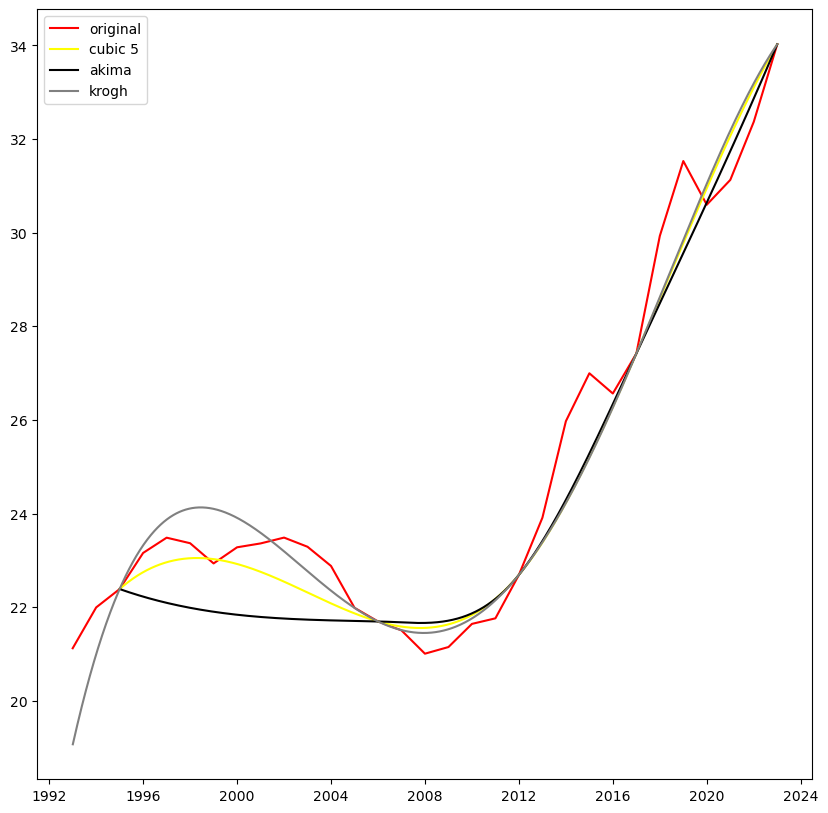

In [4]:
# OECD Petroleum Production, Annual, million barrels per day
r = requests.get('http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.PAPR_OECD.A')
j = r.json()


df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']
dates = [datetime.strptime(d[0], '%Y') for d in data]
vals = [d[1] for d in data]
df = pd.DataFrame({'Date': dates, 'OECD Petroleum Production, Annual, million barrels per day': vals})
df = df.iloc[::-1]
df = df.set_index('Date')


plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'gray', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')


plt.legend()

### Cubic 5th order looks the best

,"OECD Petroleum Production, Annual, million barrels per day"
Date,
1996-01-07,22.750345
1996-01-14,22.755692
1996-01-21,22.760985
1996-01-28,22.766224
1996-02-04,22.771410
...,...
2022-12-04,33.957228
2022-12-11,33.973869
2022-12-18,33.990458


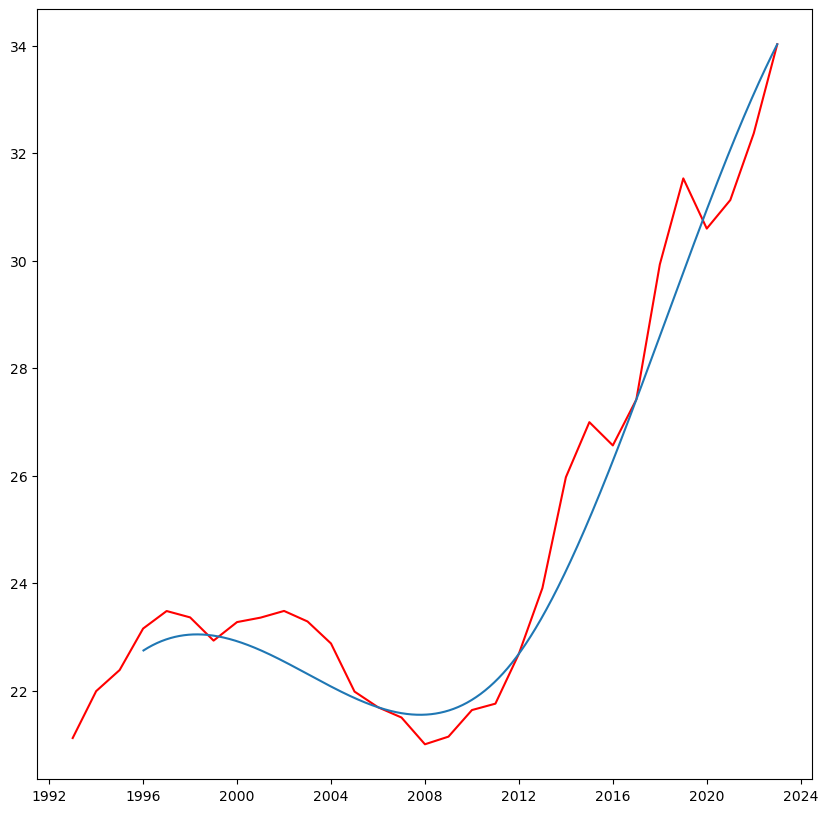

In [5]:
df1 = df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both')
df1 = df1.loc['1996-01-01':]

plt.plot(df, color = 'red')
plt.plot(df1)

df1

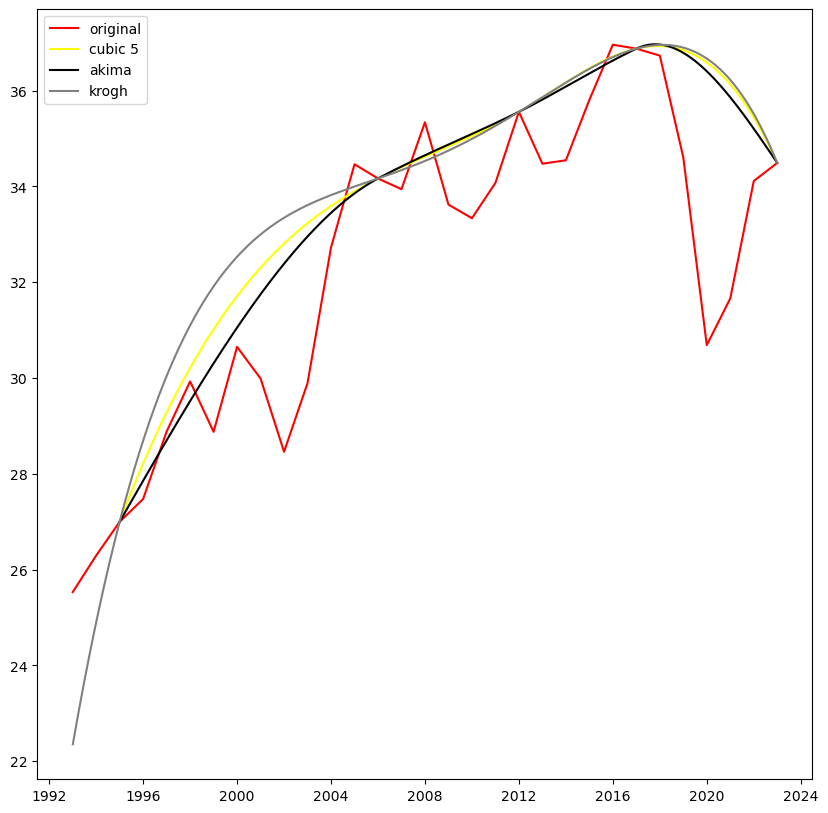

In [6]:
# OPEC
r = requests.get('http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.PAPR_OPEC.A')
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']
dates = [datetime.strptime(d[0], '%Y') for d in data]
vals = [d[1] for d in data]
df = pd.DataFrame({'Date': dates, 'OPEC Petroleum Production, Annual, million barrels per day': vals})
df = df.iloc[::-1]
df = df.set_index('Date')




# df2 = df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both')
# df2 = df2.loc['1996-01-01':]

# plt.plot(df, color = 'red')
# plt.plot(df2)

# df2

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'gray', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')


plt.legend()

### Akima looks the best

,"OPEC Petroleum Production, Annual, million barrels per day"
Date,
1996-01-07,27.866711
1996-01-14,27.883027
1996-01-21,27.899338
1996-01-28,27.915644
1996-02-04,27.931943
...,...
2022-12-04,34.545686
2022-12-11,34.531742
2022-12-18,34.517793


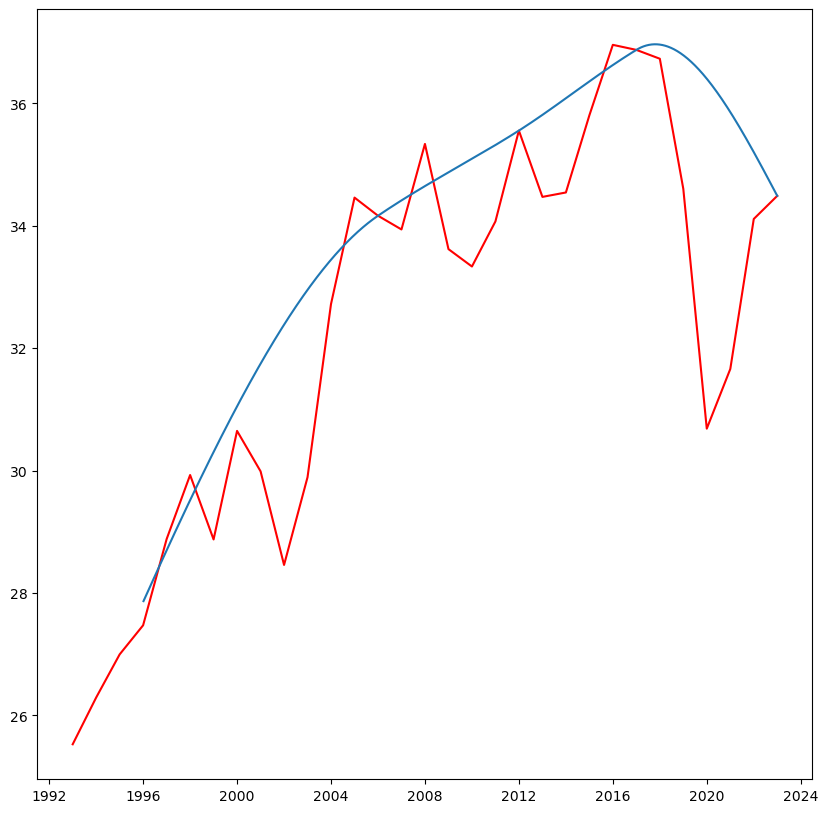

In [7]:
df2 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both')
df2 = df2.loc['1996-01-01':]

plt.plot(df, color = 'red')
plt.plot(df2)

df2

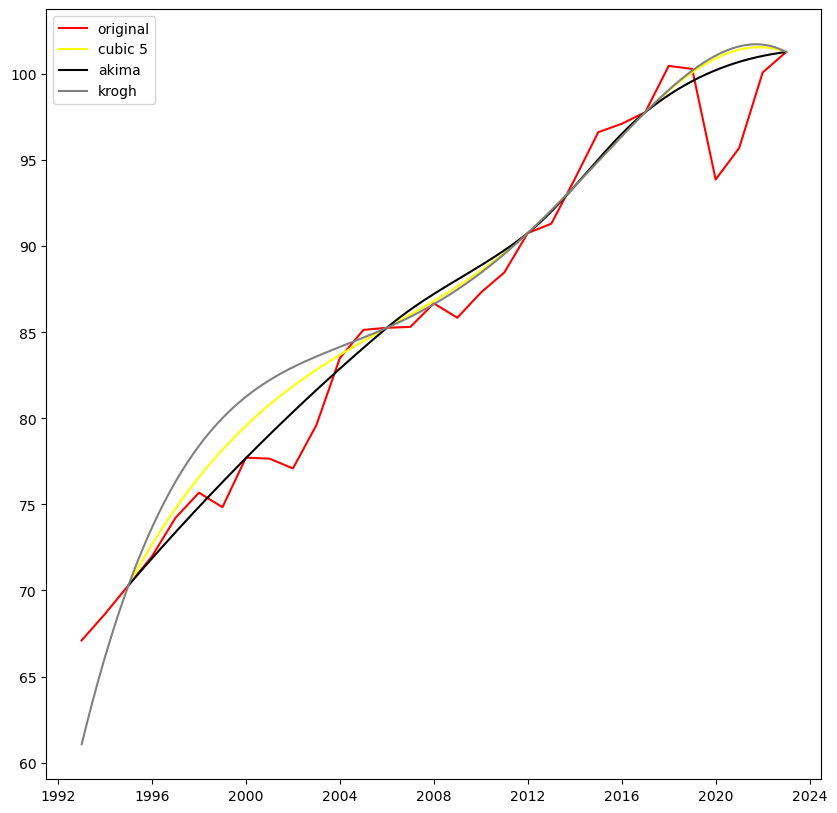

In [8]:
# World Production
'http://api.eia.gov/series/?api_key=YOUR_API_KEY_HERE&series_id=STEO.PAPR_WORLD.A'
r = requests.get('http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.PAPR_WORLD.A')
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']
dates = [datetime.strptime(d[0], '%Y') for d in data]
vals = [d[1] for d in data]
df = pd.DataFrame({'Date': dates, 'World Petroleum Production, Annual, million barrels per day': vals})
df = df.iloc[::-1]
df = df.set_index('Date')




plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'gray', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')


plt.legend()


### Akima looks the best

,"World Petroleum Production, Annual, million barrels per day"
Date,
1996-01-07,71.888512
1996-01-14,71.917984
1996-01-21,71.947441
1996-01-28,71.976882
1996-02-04,72.006308
...,...
2022-12-04,101.270811
2022-12-11,101.274263
2022-12-18,101.277677


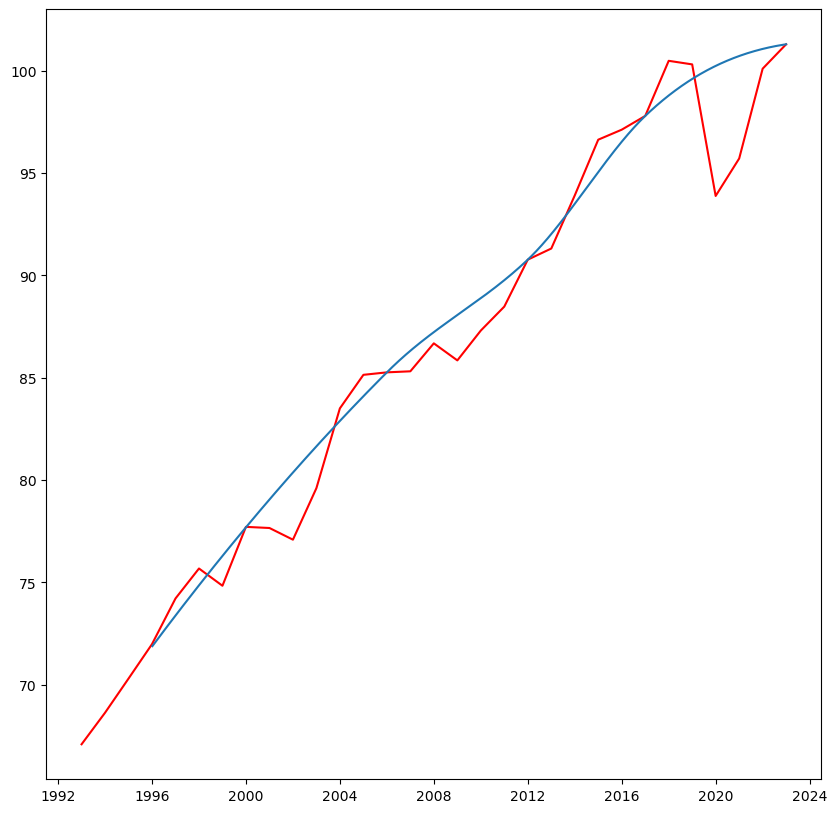

In [9]:


df3 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both')
df3 = df3.loc['1996-01-01':]
plt.plot(df, color = 'red')
plt.plot(df3)
df3

In [10]:
# Final DataFrame for Production
df = pd.merge_asof(df1, df2, on = 'Date', direction = 'nearest', tolerance = pd.Timedelta(days = 3))
df = pd.merge_asof(df, df3, on ='Date', direction ='nearest', tolerance = pd.Timedelta(days =3))
df['Rest of World Petroleum Production, Annual, million barrels per day'] = df[df.columns[3]] - df[df.columns[2]] - df[df.columns[1]] 
df = df.drop(df.columns[3], axis = 1)
df_production = df
df_production = df_production.set_index('Date')

df_production


,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day"
Date,,,
1996-01-07,22.750345,27.866711,21.271456
1996-01-14,22.755692,27.883027,21.279265
1996-01-21,22.760985,27.899338,21.287118
1996-01-28,22.766224,27.915644,21.295014
1996-02-04,22.771410,27.931943,21.302955
...,...,...,...
2022-12-04,33.957228,34.545686,32.767896
2022-12-11,33.973869,34.531742,32.768652
2022-12-18,33.990458,34.517793,32.769426


# Dataset for Petroleum (Crude Oil) Consumption, Annual, millions barrels per day

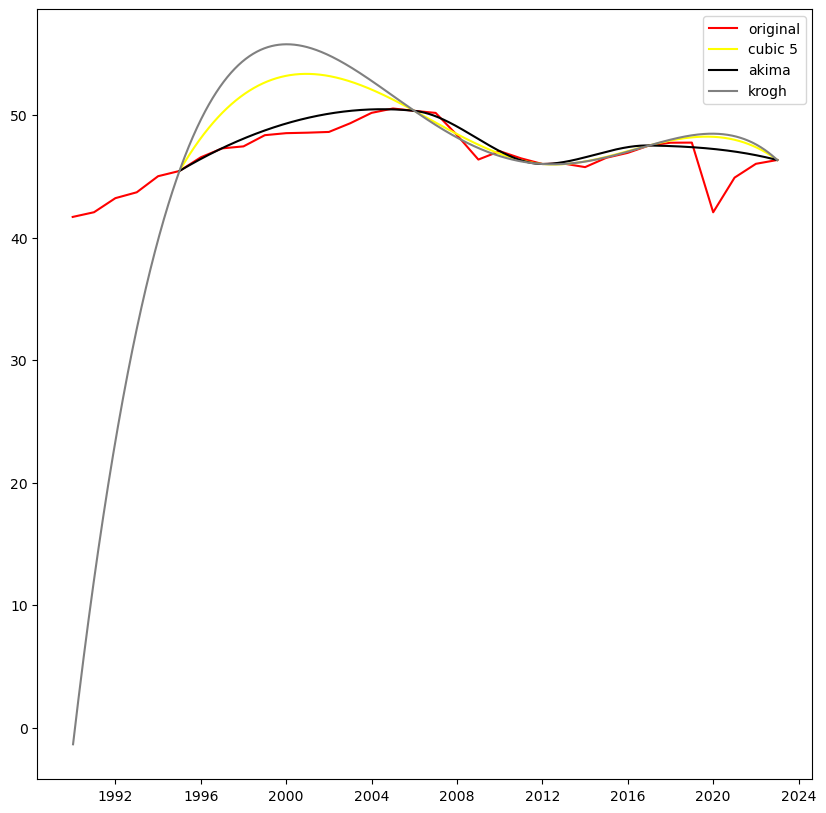

In [11]:
OECD_C = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.PATC_OECD.A'
Non_OECD_C = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.PATC_NON_OECD.A'


r = requests.get(OECD_C)
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']
dates = [datetime.strptime(d[0], '%Y') for d in data]
vals = [d[1] for d in data]
df = pd.DataFrame({'Date': dates, 'OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day': vals})
df = df.iloc[::-1]
df = df.set_index('Date')

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'gray', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')


plt.legend()


### Akima looks the best

,"OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day"
Date,
1996-01-07,46.423815
1996-01-14,46.441598
1996-01-21,46.459343
1996-01-28,46.477051
1996-02-04,46.494722
...,...
2022-12-04,46.358141
2022-12-11,46.349707
2022-12-18,46.341233


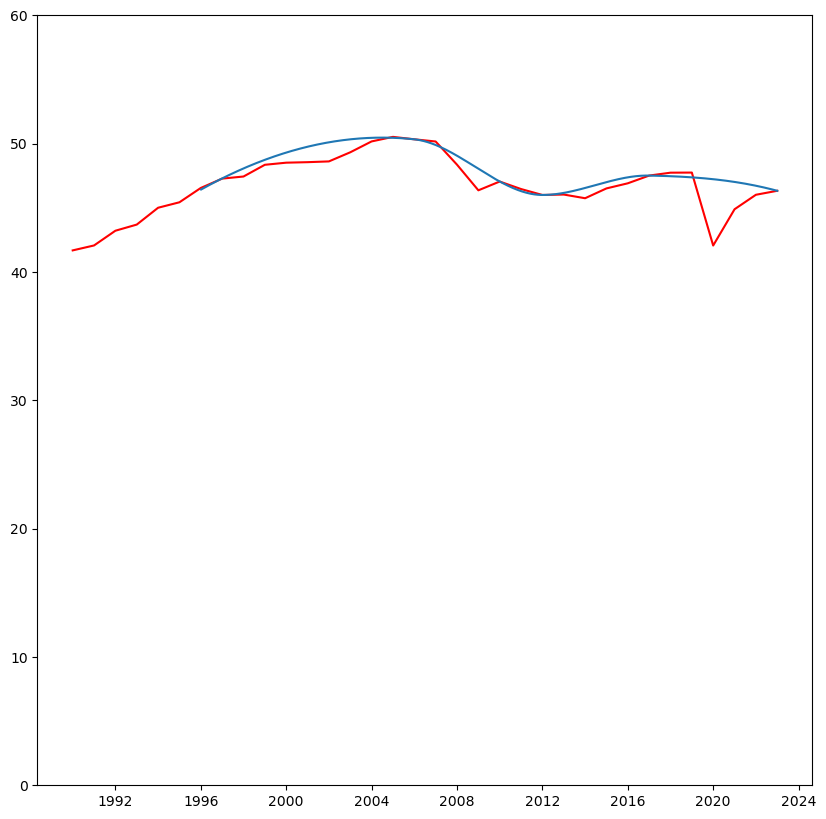

In [12]:


df1 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both')
df1 = df1.loc['1996-01-01':]
plt.plot(df, color = 'red')
plt.plot(df1)
plt.ylim(0,60)
df1

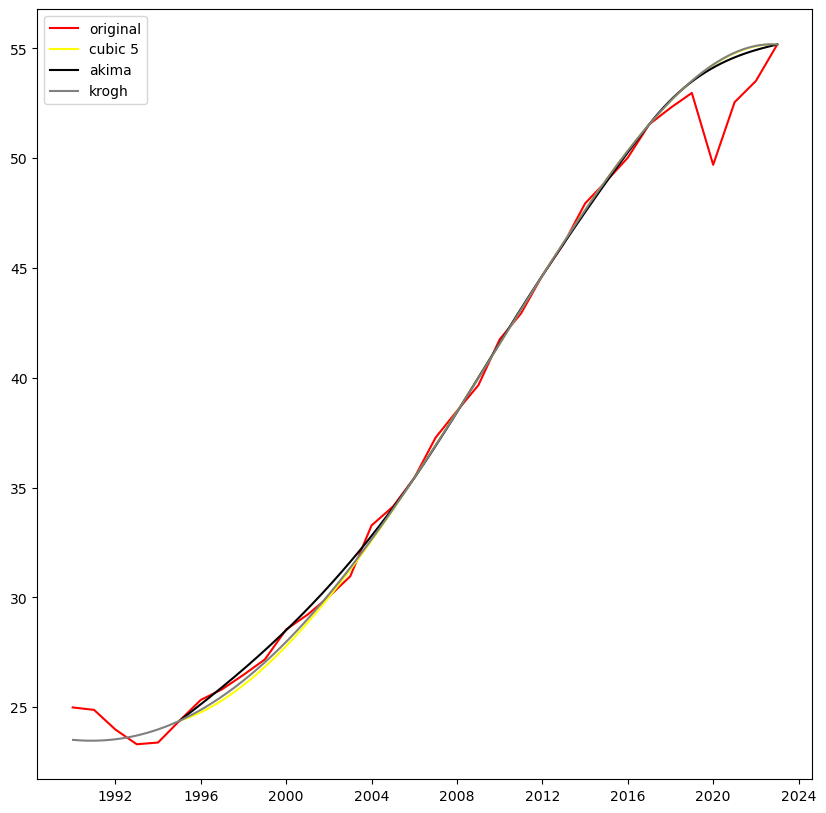

In [13]:
r = requests.get(Non_OECD_C)
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']
dates = [datetime.strptime(d[0], '%Y') for d in data]
vals = [d[1] for d in data]
df = pd.DataFrame({'Date': dates, 'Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day': vals})
df = df.iloc[::-1]
df = df.set_index('Date')

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'gray', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')


plt.legend()


# df3 = df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both')
# df3 = df3.loc['1996-01-01':]
# df3

### All look relatively good, so we'll stick with AKIMA

,"Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day"
Date,
1996-01-07,24.771691
1996-01-14,24.780752
1996-01-21,24.789871
1996-01-28,24.799047
1996-02-04,24.808282
...,...
2022-12-04,55.176119
2022-12-11,55.175507
2022-12-18,55.174799


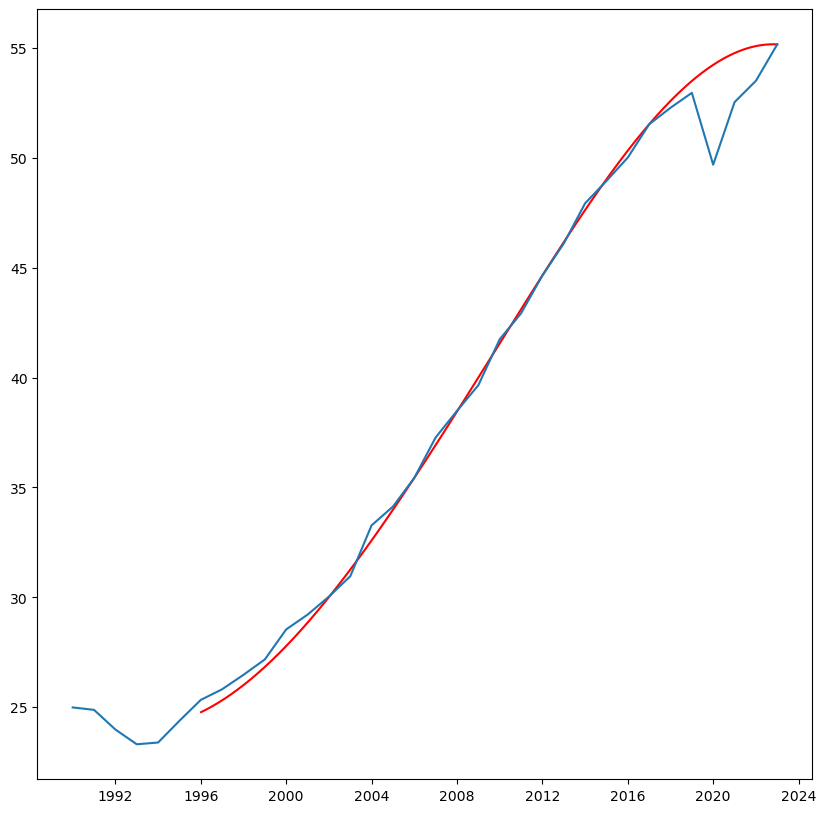

In [14]:

df2 = df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both')
df2 = df2.loc['1996-01-01':]

plt.plot(df2, color = 'red')
plt.plot(df)

df2

In [15]:
# Final DataFrame for Consumption
df_consumption = pd.merge_asof(df1, df2, on = 'Date', direction = 'nearest', tolerance = pd.Timedelta(days = 3))
df_consumption = df_consumption.set_index('Date')
df_consumption

,"OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day"
Date,,
1996-01-07,46.423815,24.771691
1996-01-14,46.441598,24.780752
1996-01-21,46.459343,24.789871
1996-01-28,46.477051,24.799047
1996-02-04,46.494722,24.808282
...,...,...
2022-12-04,46.358141,55.176119
2022-12-11,46.349707,55.175507
2022-12-18,46.341233,55.174799


# Dataset: China Imports Crude Oil

,"China Import, Millions of tons"
Date,
1996-01-07,6.22
1996-01-14,6.22
1996-01-21,6.22
1996-01-28,6.22
1996-02-04,6.22
...,...
2022-12-04,45.82
2022-12-11,45.82
2022-12-18,45.82


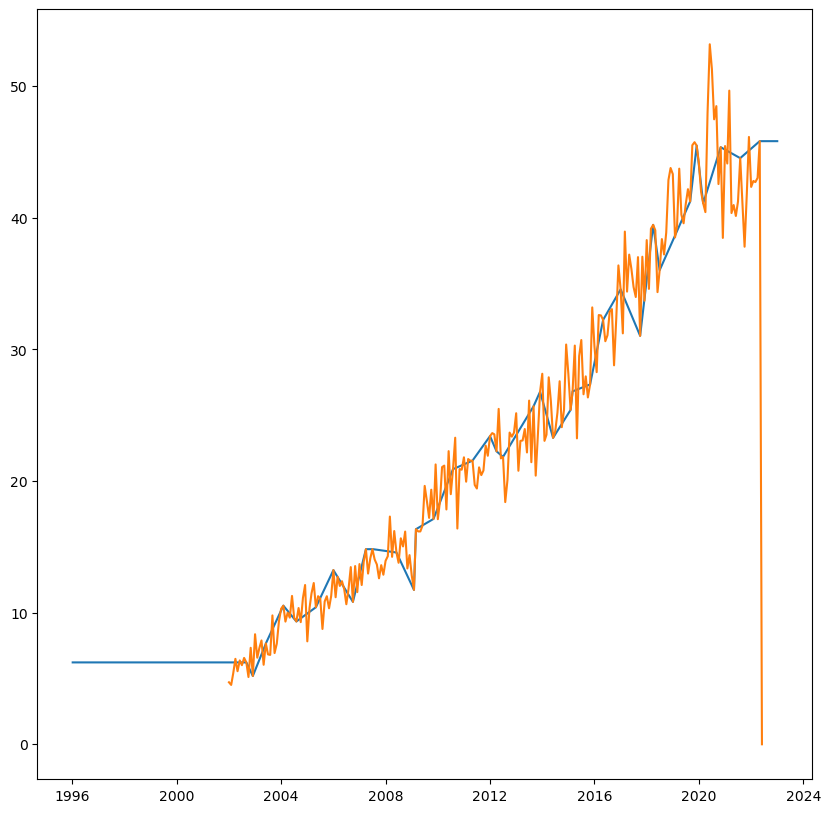

In [16]:

data = 'https://datasource.kapsarc.org/api/records/1.0/search/?dataset=china&q=&rows=250&sort=time_period&facet=time_period&facet=energy_product_name&facet=flow_breakdown&facet=unit_measure&refine.energy_product_name=Crude+Oil&refine.flow_breakdown=Imports&refine.unit_measure=KTONS'
r = requests.get(data)
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
#dates = [data['time_period'] for data in df['records'][0]]

dates = [df['records'][0][i]['fields']['time_period'] for i in range(len(df['records'][0]))]
vals = [df['records'][0][i]['fields']['obs_value'] for i in range(len(df['records'][0]))]

dates = [datetime.strptime(dates[i], '%Y-%m') for i in range(len(dates)-1, -1, -1)]
vals = [int(float(vals[i]))/1000 for i in range(len(vals)-1, -1, -1)]

df = pd.DataFrame({'Date': dates, 'China Import, Millions of tons': vals}).set_index('Date')
df = df.reset_index()


dates_back = pd.date_range(start = '1996-01-01', end = '2001-12-01', freq = 'MS').to_frame().rename(columns = {0: 'Date'})
dates_back[df.columns[1]] = np.full((len(dates_back),1),np.nan)
# dates_fwd = dates_fwd.drop(0, axis = 1).reset_index().rename(columns={'index': 'Date'})

# df = pd.concat(dates, df)
#dates_back
df = pd.merge(dates_back, df, left_on = 'Date', right_on = 'Date', how = 'outer')
df = df.drop('China Import, Millions of tons_x', axis = 1).rename(columns = {'China Import, Millions of tons_y': 'China Import, Millions of tons'} )

dates_fwd = pd.date_range(start = '2022-07-01', end = '2023-01-01', freq = 'MS').to_frame().rename(columns = {0: 'Date'})
dates_fwd[df.columns[1]] = np.full((len(dates_fwd),1),np.nan)
df = pd.merge(df, dates_fwd, left_on = 'Date', right_on = 'Date', how = 'outer')

df = df.set_index('Date')
df = df.drop('China Import, Millions of tons_y', axis = 1).rename(columns = {'China Import, Millions of tons_x': 'China Import, Millions of tons'} )

df_china_import = df.resample('W').interpolate(method = 'linear', limit_direction = 'both')

plt.plot(df_china_import)
plt.plot(df)
df_china_import

# only had data from 2002-01-01 to 2022-05-01, the rest were ffill and bfill


# Dataset for Kilian Global economic index

/opt/conda/lib/python3.9/site-packages/scipy/interpolate/polyint.py:324: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
/opt/conda/lib/python3.9/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in add
  p += pi[:,np.newaxis] * self.c[k]
/opt/conda/lib/python3.9/site-packages/scipy/interpolate/polyint.py:325: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]


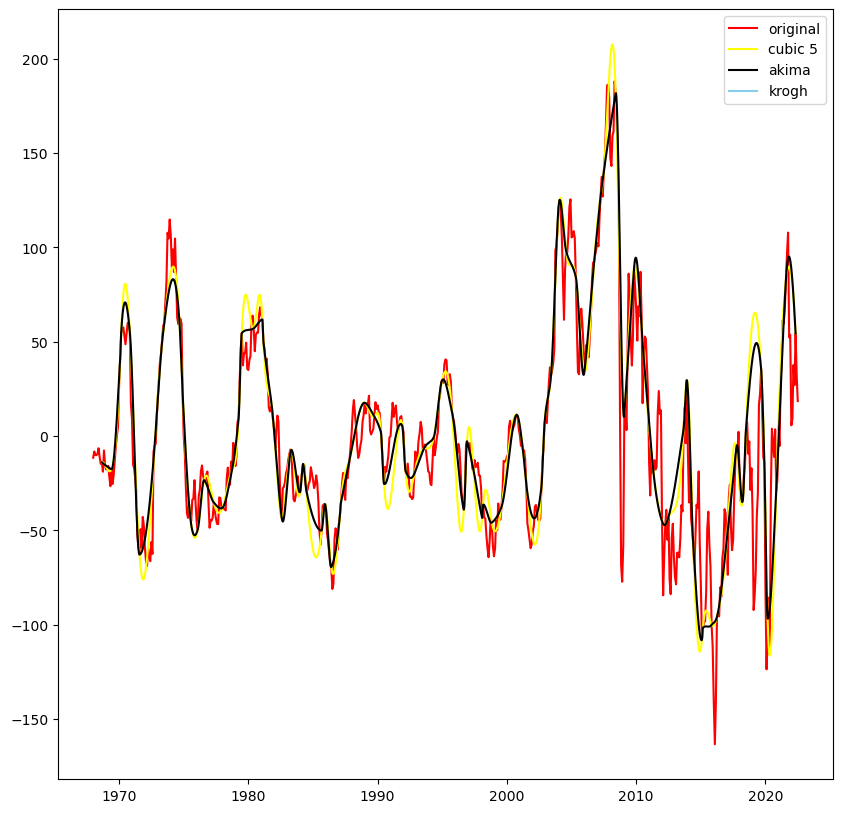

In [17]:
# a proxy for the volume of shipping in global industrial commodity markets
df = pd.read_excel('Data/igrea.xlsx')
df = df.rename(columns = {'Unnamed: 1': 'Index'})
df = df.set_index('Date')

#df = df.loc['1996-01-01':]

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(df, color = 'red', label ='original')
#plt.plot(df.resample('W').interpolate(method = 'cubic', order = 4, limit_direction = 'both'), color = 'blue', label = 'cubic 3')
#plt.plot(df.resample('W').interpolate(method = 'polynomial', order = 3, limit_direction = 'both'), color = 'green', label = 'polynomial 3')
plt.plot(df.resample('W').interpolate(method = 'cubic', order = 5, limit_direction = 'both'), color = 'yellow', label = 'cubic 5')
#plt.plot(df.resample('W').interpolate(method = 'barycentric', limit_direction = 'both'), color = 'skyblue', label = 'barycentric')
plt.plot(df.resample('W').interpolate(method = 'akima', limit_direction = 'both'), color = 'black', label = 'akima')
#plt.plot(df.resample('W').interpolate(method = 'piecewise_polynomial', limit_direction = 'both'), color = 'orange', label = 'piecewise_polynomial')
#plt.plot(df.resample('W').interpolate(method = 'nearest', limit_direction = 'both'), color = 'gray', label = 'nearest')
plt.plot(df.resample('W').interpolate(method = 'krogh', limit_direction = 'both'), color = 'skyblue', label = 'krogh')
#plt.plot(df.resample('W').interpolate(method = 'pchip', limit_direction = 'both'), color = 'lime', label = 'pchip')
#plt.plot(df.resample('W').interpolate(method = 'linear', limit_direction = 'both'), color = 'skyblue', label = 'linear')

plt.legend()

### Akima looks the best

In [18]:
date_range = pd.date_range(start = '2022-08-01', end = '2023-01-01', freq = 'MS').to_frame()
date_range['Index'] = np.full((len(date_range),1),np.nan)
date_range = date_range.drop(0, axis = 1)
date_range
df = df.append(date_range)
df

,Index
1968-01-01,-11.461982
1968-02-01,-8.144664
1968-03-01,-9.984553
1968-04-01,-10.114148
1968-05-01,-9.384524
...,...
2022-09-01,NaN
2022-10-01,NaN
2022-11-01,NaN
2022-12-01,NaN


,Kilian Global Economic Index
Date,
1996-01-07,-0.510323
1996-01-14,-1.768869
1996-01-21,-3.050747
1996-01-28,-4.353041
1996-02-04,-5.672835
...,...
2022-12-04,54.371459
2022-12-11,54.371459
2022-12-18,54.371459


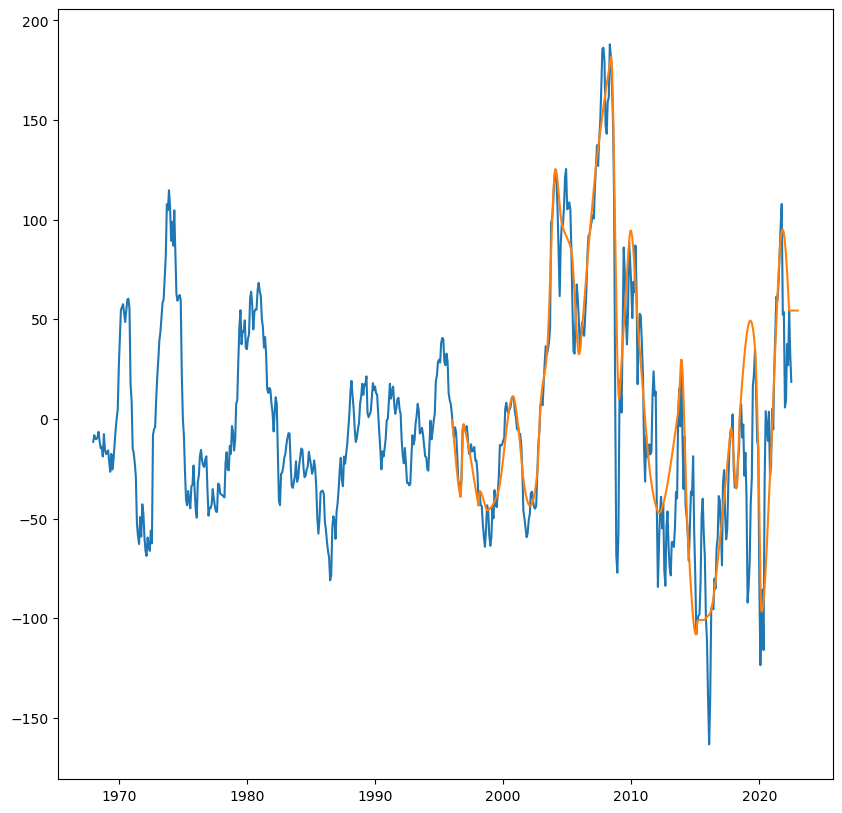

In [19]:
df1 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both').ffill()
df1 = df1.reset_index()
df1 = df1.rename(columns = {'index': 'Date'}).set_index('Date')
df_Kilian_Index = df1.loc['1996-01-01':]
plt.plot(df)
plt.plot(df_Kilian_Index)
df_Kilian_Index = df_Kilian_Index.rename(columns = {'Index': 'Kilian Global Economic Index'})
df_Kilian_Index

# Fed Funds Effective Rate

In [20]:
df = pd.read_csv('Data/FEDFUNDS.csv')
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format = True)
date_fwd = pd.date_range(start = '2022-09-01', end = '2023-01-01', freq = 'MS').to_frame()


date_fwd['Index'] = np.full((len(date_fwd),1),np.nan)

date_fwd = date_fwd.drop(0, axis = 1)

date_fwd = date_fwd.rename(columns = {'Index': "FEDFUNDS"})
date_fwd = date_fwd.rename(columns = {'index': 'Date'})

df = df.rename(columns = {'DATE': 'Date'}).set_index('Date')

df = df.append(date_range, verify_integrity = False)
df = df.drop('Index', axis = 1)
df = df.reset_index()
df = df.drop([818], axis = 0).rename(columns = {'index': 'Date'}).set_index('Date')
df.iloc[-10:]
df1 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both').ffill()
df_Fed_Funds = df1.loc['1996-01-01':]
df_Fed_Funds

,FEDFUNDS
Date,
1996-01-07,5.631697
1996-01-14,5.620614
1996-01-21,5.609388
1996-01-28,5.598039
1996-02-04,5.586589
...,...
2022-12-04,0.770000
2022-12-11,0.770000
2022-12-18,0.770000


# PMI Index

,U.S. ISM PMI Index
Date,
1996-01-07,46.200000
1996-01-14,46.012149
1996-01-21,45.706579
1996-01-28,45.500000
1996-02-04,45.500000
...,...
2022-08-07,52.800000
2022-08-14,52.800000
2022-08-21,52.800000


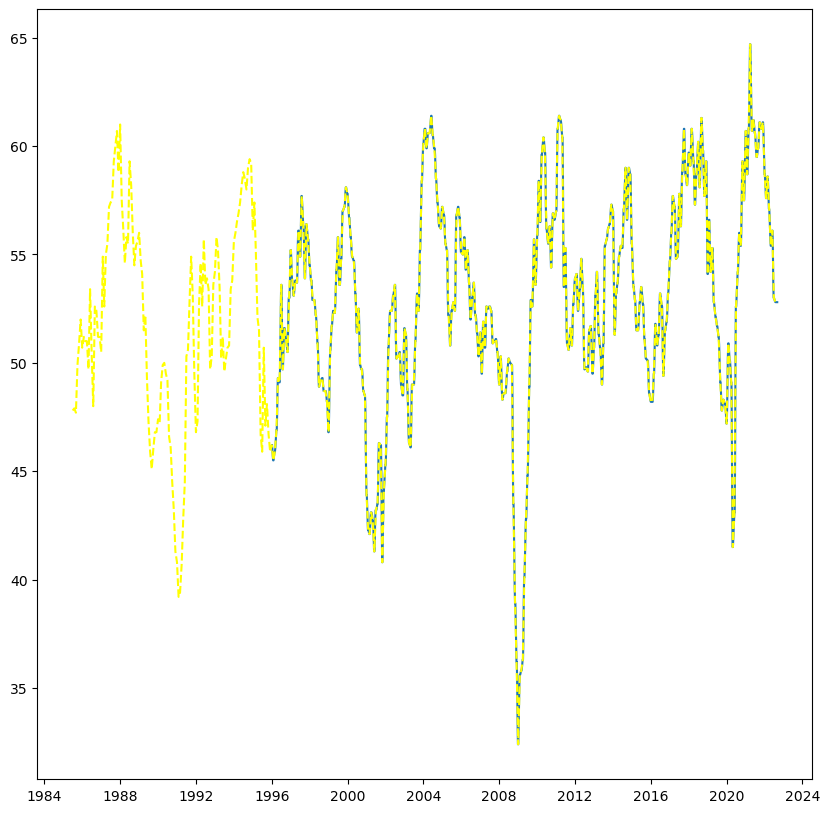

In [21]:
df = pd.read_excel('Data/PMI_index.xlsx')
df = df.iloc[:448, :]
df.loc[97]
df.loc[175]
wrong_dates = df.loc[97:175]

dates = df['Release Date']
dates1 = list(dates[97:176])
#dates1 = [dates1[]]
#dates1 = [datetime.strptime(dates[i], '%Y-%m-%d']
#dates1 = [datetime.strptime(dates1[i], '%Y-%m-%d') for i in range(97,176,1)]

dates2 = dates[0:97]
dates2 = [dates2[i].split(' ')[0:3] for i in range(len(dates2))]
dates2 = [''.join(dates2[i]) for i in range(len(dates2))]
dates2 = [date[:3] + ',' + date[3:] for date in dates2]
dates2 = [datetime.strptime(date, '%b,%d,%Y') for date in dates2]


dates3 = dates[176:]
dates3 = [dates3[i].split(' ')[0:3] for i in range(176, 448,1)]
dates3 = [''.join(dates3[i]) for i in range(len(dates3))]
dates3 = [date[:3] + ',' + date[3:] for date in dates3]
dates3 = [datetime.strptime(date, '%b,%d,%Y') for date in dates3]

dates = [dates2, dates1, dates3]
dates = [dates[i][j] for i in range(len(dates)) for j in range(len(dates[i]))]
df['Release Date'] = dates
df = df[['Release Date', 'Actual']]
df = df.rename(columns = {'Actual': 'U.S. ISM PMI Index'})
df2 = df.iloc[::-1]
df2 = df2.reset_index().drop(['index'], axis = 1)
#df2 = df2.loc['1996-01-01': ]

df2 = df2.rename(columns = {'Release Date': 'Date'}).set_index('Date')
oidx = df2.index
nidx = pd.date_range(oidx.min(), oidx.max(), freq='W')
df_PMI = df2.reindex(nidx, method='nearest', limit=1).interpolate(method = 'akima', limit_direction ='both')
df_PMI = df_PMI.loc['1996-01-01':'2022-09-04']
plt.plot(df_PMI)
plt.plot(df2, color = 'yellow', linestyle = '--')
df_PMI = df_PMI.reset_index().rename(columns = {'index':'Date'}).set_index('Date')
df_PMI

# Henry Hub Natural Gas Spot Price

,Henry Hub Natural Gas Spot Price Dollars per Million Btu
Date,
1997-01-10,3.79
1997-01-17,4.19
1997-01-24,2.98
1997-01-31,2.91
1997-02-07,2.53
...,...
2022-08-05,8.14
2022-08-12,8.15
2022-08-19,9.19


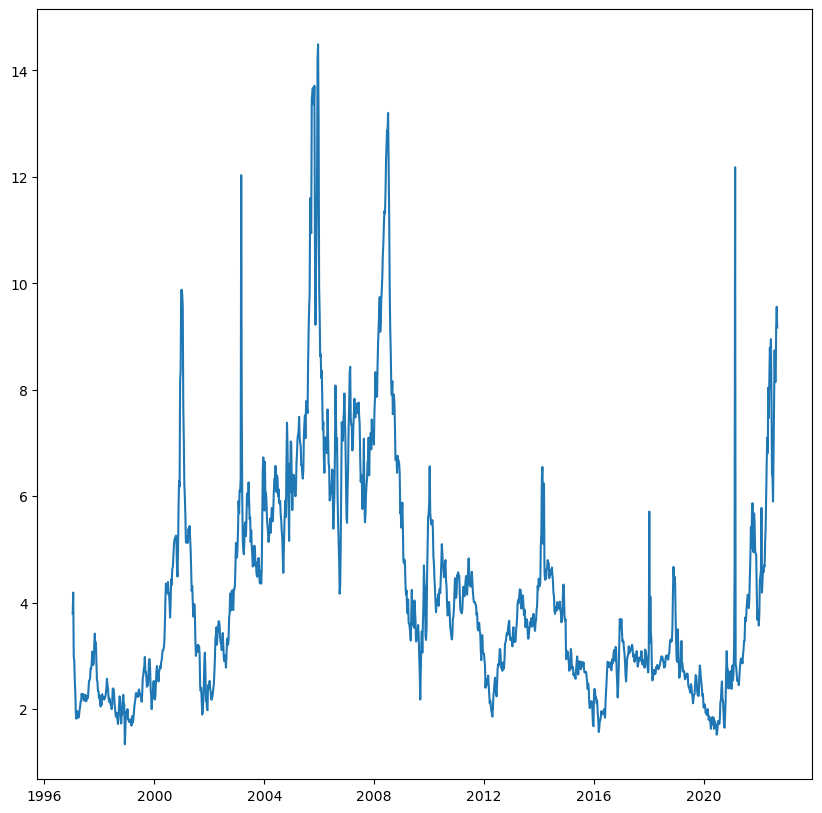

In [22]:
df = pd.read_csv('Data/Henry_Hub_Natural_Gas_Spot_Price.csv')
df = df.rename(columns = {"Week of": 'Date'})
df
dates = df['Date']
dates2 = [datetime.strptime(date, '%m/%d/%y') for date in dates]
df['Date'] = dates2
df = df.iloc[::-1].reset_index()
df = df.drop('index', axis = 1).set_index('Date')

plt.plot(df)
df_HH_Nat_Gas_p = df
df_HH_Nat_Gas_p

# US Tight Oil Production

In [23]:
# Units Millions of barrels per day
df = pd.read_excel('Data/US-tight-oil-production.xlsx')
df = df[['Date', 'Total']]
df = df.rename(columns = {'Total': 'US Tight Oil Production (Millions of Barrels per day)'})
df = df.set_index('Date')
#plt.plot(df)
df1 = df.resample('W').interpolate(method = 'akima', limit_direction = 'both').bfill()
df_tight_oil_prod = df1
df_tight_oil_prod

,US Tight Oil Production (Millions of Barrels per day)
Date,
2000-01-02,0.408969
2000-01-09,0.408969
2000-01-16,0.408969
2000-01-23,0.408969
2000-01-30,0.408969
...,...
2022-04-03,7.855408
2022-04-10,7.867314
2022-04-17,7.879347


# Crude Oil Inventory

In [24]:
df = pd.read_excel('Data/psw01.xls')
df = df.rename(columns = {df.columns[1]: 'U.S. Total Crude Oil Inventory (Millions Barrels)', 
               df.columns[2]: 'U.S. Non-SPR Crude Oil Inventory (Millions Barrels)',
               df.columns[3]: 'U.S. SPR Crude Oil Inventory (Millions Barrels)'})
df['U.S. Total Crude Oil Inventory (Millions Barrels)'] = df['U.S. Total Crude Oil Inventory (Millions Barrels)']/1000
df['U.S. Non-SPR Crude Oil Inventory (Millions Barrels)'] = df['U.S. Non-SPR Crude Oil Inventory (Millions Barrels)']/1000
df['U.S. SPR Crude Oil Inventory (Millions Barrels)'] = df['U.S. SPR Crude Oil Inventory (Millions Barrels)']/1000
df = df.set_index('Date')
df_inventory = df.loc['1996-01-01':]
df_inventory



,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels)
Date,,,
1996-01-05,877.271,285.623,591.648
1996-01-12,880.191,288.551,591.640
1996-01-19,884.469,292.829,591.640
1996-01-26,882.724,291.084,591.640
1996-02-02,880.314,288.674,591.640
...,...,...,...
2022-08-05,896.568,432.010,464.558
2022-08-12,886.110,424.954,461.156
2022-08-19,874.737,421.672,453.065


# Real Dollar Index

In [25]:
df = yf.Ticker('DX-Y.NYB').history(period = 'max', interval = '1wk')
df = df[['Close']].reset_index()
df = df.set_index('Date')
df = df.rename(columns = {'Close': 'Real Dollar Index'})
df_Real_Dollar_index = df.loc['1996-01-01':]
df_Real_Dollar_index

,Real Dollar Index
Date,
1996-01-01,85.059998
1996-01-08,85.059998
1996-01-15,86.750000
1996-01-22,87.639999
1996-01-29,87.010002
...,...
2022-08-15,108.169998
2022-08-22,108.800003
2022-08-29,109.529999


# Gold Futures: COMEX

,Closing Price: Gold ($ per ounce)
Date,
2000-08-28,277.000000
2000-09-04,273.299988
2000-09-11,272.299988
2000-09-18,271.799988
2000-09-25,273.600006
...,...
2022-08-15,1747.599976
2022-08-22,1736.099976
2022-08-29,1709.800049


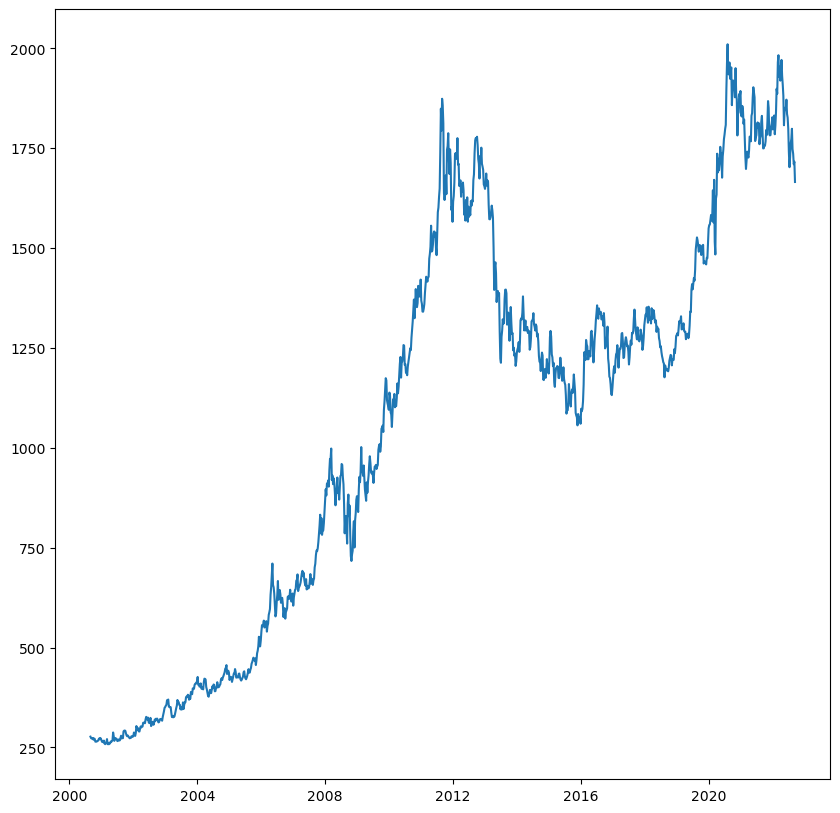

In [26]:
df = yf.Ticker('GC=F').history(period = 'max', interval = '1wk')
df_gold = df[['Close']]
df_gold = df_gold.rename(columns = {'Close': 'Closing Price: Gold ($ per ounce)'})
plt.plot(df_gold)
df_gold

# Real GDP

,Real GDP - Seasonally Adjusted (Billions of $)
Date,
1996-01-07,10836.997035
1996-01-14,10844.090628
1996-01-21,10851.240897
1996-01-28,10858.446833
1996-02-04,10865.707427
...,...
2022-12-04,19803.968146
2022-12-11,19808.540335
2022-12-18,19813.218966


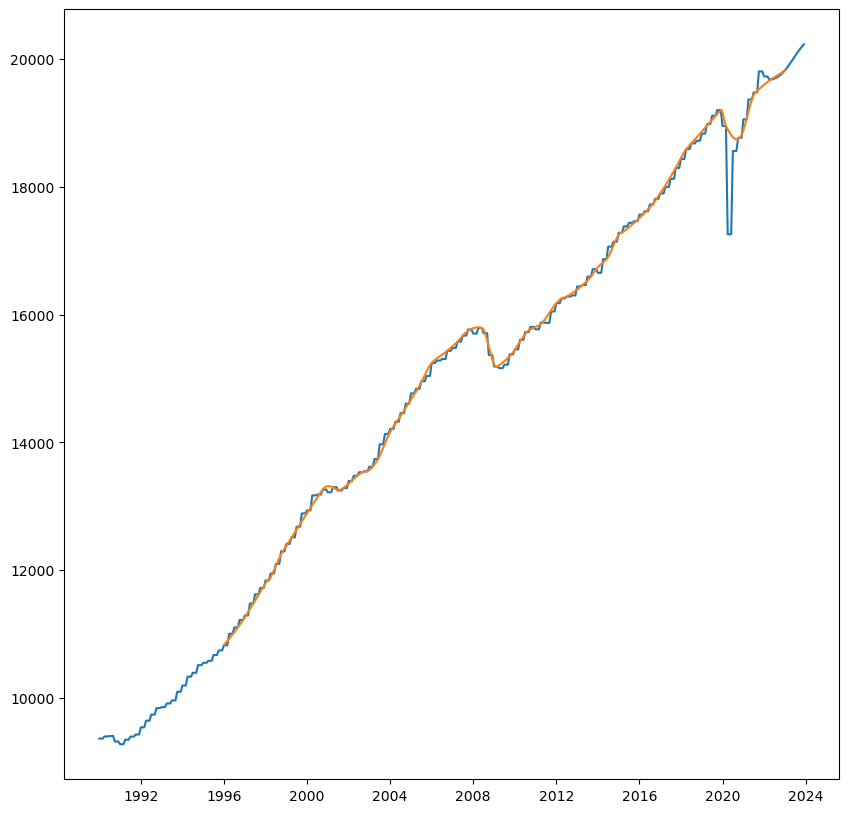

In [27]:
link = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.GDPQXUS.M'

r = requests.get(link)
j = r.json()

df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))

data = df['series'][0][0]['data']
vals = [d[1] for d in data]

dates = [[d[0][0:4] + ',' + d[0][4:]] for d in data]
dates = [datetime.strptime(d[0], '%Y,%m') for d in dates]

df = pd.DataFrame({'Date': dates, 'Real GDP - Seasonally Adjusted (Billions of $)': vals})
df = df.iloc[::-1]
df = df.set_index('Date')
#df = df.loc['1996-01-01':]
#plt.plot(df)
df_GDP = df.resample('W').interpolate(method = 'akima', limit_direction ='both')
#plt.plot(df_GDP)
df_GDP = df_GDP.loc['1996-01-01':'2023-01-01']

plt.plot(df)
plt.plot(df_GDP)
df_GDP

# WTI-Brent Crude Oil Price Spread

## Brent Spot Price

In [28]:
link = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=PET.RBRTE.W'
r = requests.get(link)
j = r.json()
df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level = 1))
data = df['series'][0][0]['data']

dates = [datetime.strptime(d[0][0:4] + '-' + d[0][4:6] + '-' + d[0][6:], '%Y-%m-%d') for d in data]
vals = [d[1] for d in data]

df_brent = pd.DataFrame({'Date': dates, 'Brent Spot Price ($ per barrel)': vals}).set_index('Date')
df_brent = df_brent.iloc[::-1]
df_brent = df_brent.loc['1996-01-01': '2022-09-07']
df_brent

,Brent Spot Price ($ per barrel)
Date,
1996-01-05,19.18
1996-01-12,18.53
1996-01-19,17.61
1996-01-26,17.19
1996-02-02,16.64
...,...
2022-08-05,102.54
2022-08-12,104.64
2022-08-19,96.73


## WTI Spot Price

In [29]:
link = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=PET.RWTC.W'
r = requests.get(link)
j = r.json()

df = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
data = df['series'][0][0]['data']

dates = [datetime.strptime(d[0][0:4] + '-' + d[0][4:6] + '-' + d[0][6:], '%Y-%m-%d') for d in data]
vals = [d[1] for d in data]

df_wti = pd.DataFrame({'Date': dates, 'WTI Spot Price ($ per barrel)': vals}).set_index('Date')
df_wti = df_wti.iloc[::-1]
df_wti = df_wti.loc['1996-01-01': '2022-09-07']
df_wti

,WTI Spot Price ($ per barrel)
Date,
1996-01-05,19.99
1996-01-12,19.43
1996-01-19,18.64
1996-01-26,18.35
1996-02-02,17.64
...,...
2022-08-05,94.01
2022-08-12,94.65
2022-08-19,91.81


## WTI-Brent Price Spread

In [30]:
spread = df_wti[df_wti.columns[0]] - df_brent[df_brent.columns[0]]
df_spread = pd.DataFrame({'Date': df_brent.index, 'WTI-Brent Price Spread ($)': spread}).drop(columns = ['Date'])
#df_spread = df_spread.iloc[:1842, :]
#df_spread = df_spread.iloc[::-1]
df_spread

,WTI-Brent Price Spread ($)
Date,
1996-01-05,0.81
1996-01-12,0.90
1996-01-19,1.03
1996-01-26,1.16
1996-02-02,1.00
...,...
2022-08-05,-8.53
2022-08-12,-9.99
2022-08-19,-4.92


# Crack Spread = (2*Gasoline + 1*Distillate - 3*WTI)/3

In [31]:
link_gas = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.MGWHUUS.M'
link_distillate = 'http://api.eia.gov/series/?api_key=' + EIA_API + '&series_id=STEO.DSWHUUS.M'

r = requests.get(link_gas)
j = r.json()

df_gas = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))

r = requests.get(link_distillate)
j = r.json()

df_dis = pd.DataFrame.from_dict(pd.json_normalize(j, max_level=1))
# cents per gallon
data_g = df_gas['series'][0][0]['data']
data_d = df_dis['series'][0][0]['data']

dates = [datetime.strptime(d[0][0:4] + '-' + d[0][4:], '%Y-%m') for d in data_g]

# Convert from cents/gallon to $/Barrels
vals_g = [42*d[1]/100 for d in data_g]
vals_d = [42*d[1]/100 for d in data_d]

#crack_spread = (2*vals_g + vals_d - 3*)
# Reverse dataframe so ascending order
df_d = pd.DataFrame({'Date': dates, 'Diesel Price per Barrel': vals_d}).set_index('Date')
df_g = pd.DataFrame({'Date': dates, 'Gasoline Price per Barrel': vals_g}).set_index('Date')

df_d = df_d.iloc[::-1]
df_g = df_g.iloc[::-1]

#df_d = df_d.loc['1996-01-01':'2022-09-07']
#df_g = df_g.loc['1996-01-01':'2022-09-07']

# convert from M to W using interpolation
interpolate_d = df_d.resample('W').interpolate(method = 'polynomial', order = 2, limit_direction = 'both')
interpolate_g = df_g.resample('W').interpolate(method = 'polynomial', order = 2, limit_direction = 'both')

interpolate_d = interpolate_d.loc['1996-01-01': '2022-09-07'].reset_index()
interpolate_g = interpolate_g.loc['1996-01-01': '2022-09-07'].reset_index()

df = pd.merge_asof(df_wti, df_brent, on = 'Date', direction = 'nearest', tolerance = pd.Timedelta(days = 3))
df = pd.merge_asof(df, interpolate_d, on = 'Date', direction = 'nearest', tolerance=pd.Timedelta(days = 3))
df = pd.merge_asof(df, interpolate_g, on = 'Date', direction = 'nearest', tolerance = pd.Timedelta(days = 3))
df = pd.merge_asof(df, df_spread, on ='Date', direction ='nearest', tolerance = pd.Timedelta(days = 3))

df['WTI Crack Spread'] = (2*df['Gasoline Price per Barrel'] + df['Diesel Price per Barrel'] - 3*df['WTI Spot Price ($ per barrel)'])/3
df['Brent Crack Spread'] = (2*df['Gasoline Price per Barrel'] + df['Diesel Price per Barrel'] - 3*df['Brent Spot Price ($ per barrel)'])/3
df_price_tech = df
df_price_tech = df_price_tech.set_index('Date')
df_price_tech
# rbob = yf.Ticker('RB=F').history(period = 'max')
# rbob

,WTI Spot Price ($ per barrel),Brent Spot Price ($ per barrel),Diesel Price per Barrel,Gasoline Price per Barrel,WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread
Date,,,,,,,
1996-01-05,19.99,19.18,25.009679,25.822161,0.81,5.561334,6.371334
1996-01-12,19.43,18.53,25.189603,25.938273,0.90,6.258716,7.158716
1996-01-19,18.64,17.61,25.373729,26.059140,1.03,7.190670,8.220670
1996-01-26,18.35,17.19,25.562057,26.184764,1.16,7.627195,8.787195
1996-02-02,17.64,16.64,25.754588,26.315144,1.00,8.488292,9.488292
...,...,...,...,...,...,...,...
2022-08-05,94.01,102.54,173.001798,150.375008,-8.53,63.907272,55.377272
2022-08-12,94.65,104.64,171.684547,148.567587,-9.99,61.623240,51.633240
2022-08-19,91.81,96.73,170.233694,146.633443,-4.92,62.690193,57.770193


# PPI

,PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
Date,
1996-01-07,83.713374
1996-01-14,83.806880
1996-01-21,83.905108
1996-01-28,84.008056
1996-02-04,84.115725
...,...
2022-09-04,302.965000
2022-09-11,302.965000
2022-09-18,302.965000


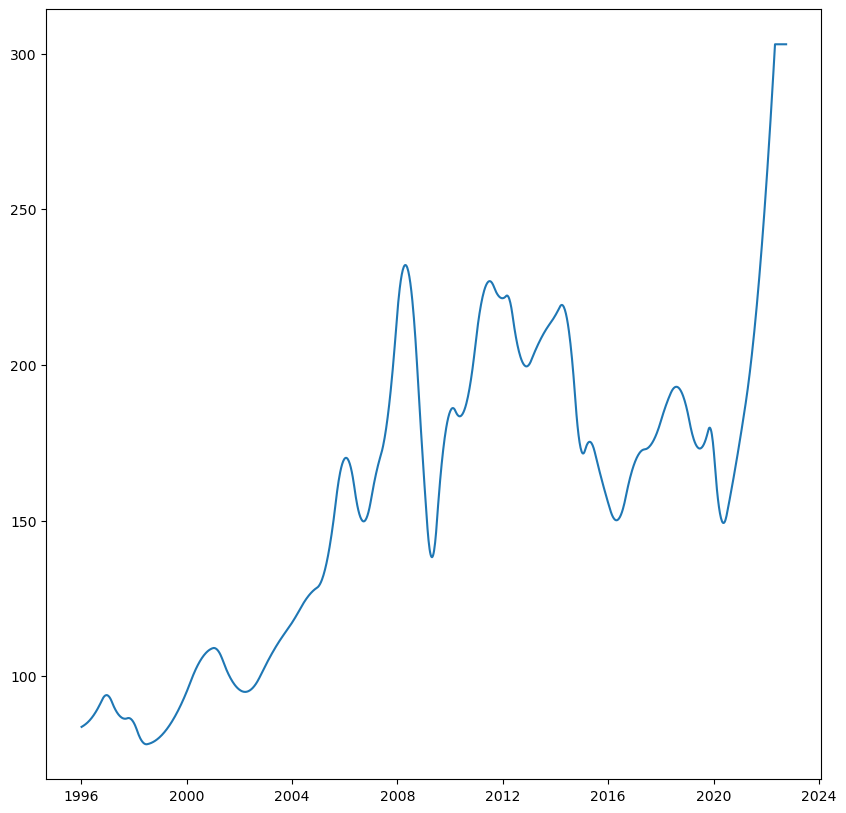

In [32]:
df = pd.read_csv('Data/WPSID69113.csv')

dates = [datetime.strptime(d, '%Y-%m-%d') for d in df['DATE']]
df['DATE'] = dates
df = df.rename(columns = {'DATE': 'Date'})
#date_range = pd.date_range(start = '1974-01-01', end = '2022-10-01', freq='MS')
dates = pd.date_range(start = '2022-08-01', end = '2022-10-01', freq = 'MS').to_frame()
df = df.rename(columns = {'WPSID69113': 'PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods'})
dates['PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods'] = np.full((3,1),np.nan)
dates = dates.drop(0, axis = 1).reset_index().rename(columns={'index': 'Date'})
df = df.append(dates)
df = df.set_index('Date')
df
df = df.resample('W').interpolate(method = 'polynomial', order = 2, limit_direction = 'both').ffill()
df = df.loc['1996-01-01': ]
df_PPI = df
plt.plot(df_PPI)
df_PPI


# Merge our DataFrames

In [33]:
pd.set_option('display.max_columns', None)
dataframes = [df_production, df_consumption, df_china_import, df_Kilian_Index, 
              df_Fed_Funds, df_PMI, df_HH_Nat_Gas_p, df_inventory, df_tight_oil_prod, 
              df_Real_Dollar_index, df_gold, df_GDP, df_PPI]
base = df_price_tech
n = len(dataframes)

def merge_df(base, arr):
    count = 0
    for d in arr:
        print(count)
        base = pd.merge_asof(base, d, on = 'Date', direction = 'nearest', tolerance = pd.Timedelta(days = 3))
        count += 1
    return base

df_final = merge_df(base, dataframes)        
df_final

0
1
2
3
4
5
6
7
8
9
10
11
12


,Date,WTI Spot Price ($ per barrel),Brent Spot Price ($ per barrel),Diesel Price per Barrel,Gasoline Price per Barrel,WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
0,1996-01-05,19.99,19.18,25.009679,25.822161,0.81,5.561334,6.371334,22.750345,27.866711,21.271456,46.423815,24.771691,6.22,-0.510323,5.631697,46.200000,NaN,877.271,285.623,591.648,NaN,85.059998,NaN,10836.997035,83.713374
1,1996-01-12,19.43,18.53,25.189603,25.938273,0.90,6.258716,7.158716,22.755692,27.883027,21.279265,46.441598,24.780752,6.22,-1.768869,5.620614,46.012149,NaN,880.191,288.551,591.640,NaN,86.750000,NaN,10844.090628,83.806880
2,1996-01-19,18.64,17.61,25.373729,26.059140,1.03,7.190670,8.220670,22.760985,27.899338,21.287118,46.459343,24.789871,6.22,-3.050747,5.609388,45.706579,NaN,884.469,292.829,591.640,NaN,87.639999,NaN,10851.240897,83.905108
3,1996-01-26,18.35,17.19,25.562057,26.184764,1.16,7.627195,8.787195,22.766224,27.915644,21.295014,46.477051,24.799047,6.22,-4.353041,5.598039,45.500000,NaN,882.724,291.084,591.640,NaN,87.010002,NaN,10858.446833,84.008056
4,1996-02-02,17.64,16.64,25.754588,26.315144,1.00,8.488292,9.488292,22.771410,27.931943,21.302955,46.494722,24.808282,6.22,-5.672835,5.586589,45.500000,NaN,880.314,288.674,591.640,NaN,86.870003,NaN,10865.707427,84.115725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2022-08-05,94.01,102.54,173.001798,150.375008,-8.53,63.907272,55.377272,33.666752,34.781673,32.757806,46.495357,55.172034,45.82,54.371459,0.770000,52.800000,8.14,896.568,432.010,464.558,NaN,105.629997,1798.599976,19736.604667,302.965000
1388,2022-08-12,94.65,104.64,171.684547,148.567587,-9.99,61.623240,51.633240,33.684226,34.767864,32.758254,46.487603,55.173025,45.82,54.371459,0.770000,52.800000,8.15,886.110,424.954,461.156,NaN,108.169998,1747.599976,19740.302378,302.965000
1389,2022-08-19,91.81,96.73,170.233694,146.633443,-4.92,62.690193,57.770193,33.701652,34.754043,32.758721,46.479809,55.173922,45.82,54.371459,0.770000,52.800000,9.19,874.737,421.672,453.065,NaN,108.800003,1736.099976,19744.002639,302.965000
1390,2022-08-26,94.47,98.87,168.649237,144.572576,-4.40,58.128129,53.728129,33.719031,34.740213,32.759206,46.471976,55.174727,45.82,54.371459,0.770000,52.800000,9.56,868.344,418.346,449.998,NaN,109.529999,1709.800049,19747.711559,302.965000


In [34]:
idx_nan = pd.isnull(df_final).any(1).to_numpy().nonzero()
idx_nan

# fix nan at 508
df_final.loc[508, df_final.columns[17]] = (df_final.loc[507, df_final.columns[17]] + df_final.loc[509, df_final.columns[17]])/2
df_final.iloc[507:510]

,Date,WTI Spot Price ($ per barrel),Brent Spot Price ($ per barrel),Diesel Price per Barrel,Gasoline Price per Barrel,WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
507,2005-09-23,66.43,63.63,72.292535,71.811678,2.80,5.541964,8.341964,21.735202,34.091158,29.125196,50.378946,35.042991,12.102000,44.426539,3.785334,56.800000,13.460,985.144,289.644,695.50,0.422848,89.519997,469.000000,15101.017133,160.587071
508,2005-09-30,66.06,62.16,72.670368,72.090478,3.90,6.223774,10.123774,21.732135,34.096678,29.144944,50.376151,35.071033,12.182571,42.472031,3.821962,56.800000,13.565,982.648,289.398,693.25,0.423293,89.169998,474.700012,15113.579536,161.702579
509,2005-10-07,63.06,58.93,73.031033,72.344476,4.13,9.513329,13.643329,21.729090,34.102160,29.164695,50.373313,35.099093,12.263143,40.641084,3.858507,56.903441,13.670,980.844,290.324,690.52,0.423739,89.349998,469.200012,15125.908769,162.748811


In [35]:
idx_nan = pd.isnull(df_final).any(1).to_numpy().nonzero()
idx_nan
df_final_clean = df_final[~df_final.isnull().any(axis = 1)]
df_final_clean

,Date,WTI Spot Price ($ per barrel),Brent Spot Price ($ per barrel),Diesel Price per Barrel,Gasoline Price per Barrel,WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
242,2000-08-25,32.46,31.77,44.251709,41.825067,0.69,10.173947,10.863947,22.818314,31.511831,24.253930,49.611187,28.462708,6.220000,10.250146,6.599460,49.900000,4.63,842.054,270.948,571.106,0.408969,111.419998,277.000000,13216.511054,106.664580
243,2000-09-01,33.08,34.32,44.181410,42.038982,-1.24,9.673125,8.433125,22.814929,31.525013,24.270018,49.619576,28.483413,6.220000,10.572120,6.588459,49.900000,4.66,844.797,273.691,571.106,0.408969,114.339996,273.299988,13225.700170,106.869191
244,2000-09-08,34.42,36.43,44.089089,42.255833,-2.01,8.446918,6.436918,22.811525,31.538174,24.286131,49.627926,28.504156,6.220000,10.838357,6.574116,49.820635,4.82,844.129,272.764,571.365,0.408969,115.940002,272.299988,13234.868962,107.065038
245,2000-09-15,34.70,33.26,43.974747,42.475620,1.44,8.275329,9.715329,22.808103,31.551314,24.302268,49.636235,28.524937,6.220000,11.046938,6.556328,49.738095,5.05,841.647,270.282,571.365,0.408969,113.559998,271.799988,13244.017092,107.252122
246,2000-09-22,35.49,33.09,43.838384,42.698342,2.40,7.588356,9.988356,22.804664,31.564433,24.318429,49.644504,28.545757,6.220000,11.195944,6.534990,49.700000,5.17,841.146,269.781,571.365,0.408969,113.250000,273.600006,13253.144218,107.430443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2022-04-01,103.89,111.26,173.866232,161.238985,-7.37,61.558067,54.188067,33.344364,35.028005,32.752883,46.628363,55.138453,45.687692,64.132896,0.668823,57.100000,5.41,976.951,412.371,564.580,7.855408,99.800003,1941.599976,19663.855949,291.673139
1370,2022-04-08,99.21,103.33,174.953831,161.712575,-4.12,66.916327,62.796327,33.362655,35.014449,32.752999,46.621296,55.141093,45.720769,61.763815,0.693471,56.733396,6.08,982.434,421.753,560.681,7.867314,100.500000,1970.900024,19668.392999,294.449646
1371,2022-04-15,101.46,105.42,175.907828,162.059442,-3.96,65.215571,61.255571,33.380901,35.000876,32.753134,46.614191,55.143643,45.753846,59.344427,0.718550,56.210452,6.64,969.713,413.733,555.980,7.879347,101.220001,1931.000000,19672.876981,297.257125
1372,2022-04-22,104.02,105.72,176.728223,162.279587,-1.70,63.075799,61.375799,33.399104,34.987287,32.753287,46.607049,55.146103,45.786923,56.878914,0.744060,55.707282,7.10,967.494,414.424,553.070,7.891511,102.959999,1909.300049,19677.306960,300.095576


In [36]:
# remove brent price, Diesel price per Barrel, and Gasoline Price per barrel
df_final_clean = df_final_clean.drop(df_final_clean.columns[[2,3,4]], axis = 1)
# Set Date as index
df_final_clean = df_final_clean.set_index('Date')
df_final_clean

,WTI Spot Price ($ per barrel),WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
Date,,,,,,,,,,,,,,,,,,,,,,
2000-08-25,32.46,0.69,10.173947,10.863947,22.818314,31.511831,24.253930,49.611187,28.462708,6.220000,10.250146,6.599460,49.900000,4.63,842.054,270.948,571.106,0.408969,111.419998,277.000000,13216.511054,106.664580
2000-09-01,33.08,-1.24,9.673125,8.433125,22.814929,31.525013,24.270018,49.619576,28.483413,6.220000,10.572120,6.588459,49.900000,4.66,844.797,273.691,571.106,0.408969,114.339996,273.299988,13225.700170,106.869191
2000-09-08,34.42,-2.01,8.446918,6.436918,22.811525,31.538174,24.286131,49.627926,28.504156,6.220000,10.838357,6.574116,49.820635,4.82,844.129,272.764,571.365,0.408969,115.940002,272.299988,13234.868962,107.065038
2000-09-15,34.70,1.44,8.275329,9.715329,22.808103,31.551314,24.302268,49.636235,28.524937,6.220000,11.046938,6.556328,49.738095,5.05,841.647,270.282,571.365,0.408969,113.559998,271.799988,13244.017092,107.252122
2000-09-22,35.49,2.40,7.588356,9.988356,22.804664,31.564433,24.318429,49.644504,28.545757,6.220000,11.195944,6.534990,49.700000,5.17,841.146,269.781,571.365,0.408969,113.250000,273.600006,13253.144218,107.430443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,103.89,-7.37,61.558067,54.188067,33.344364,35.028005,32.752883,46.628363,55.138453,45.687692,64.132896,0.668823,57.100000,5.41,976.951,412.371,564.580,7.855408,99.800003,1941.599976,19663.855949,291.673139
2022-04-08,99.21,-4.12,66.916327,62.796327,33.362655,35.014449,32.752999,46.621296,55.141093,45.720769,61.763815,0.693471,56.733396,6.08,982.434,421.753,560.681,7.867314,100.500000,1970.900024,19668.392999,294.449646
2022-04-15,101.46,-3.96,65.215571,61.255571,33.380901,35.000876,32.753134,46.614191,55.143643,45.753846,59.344427,0.718550,56.210452,6.64,969.713,413.733,555.980,7.879347,101.220001,1931.000000,19672.876981,297.257125


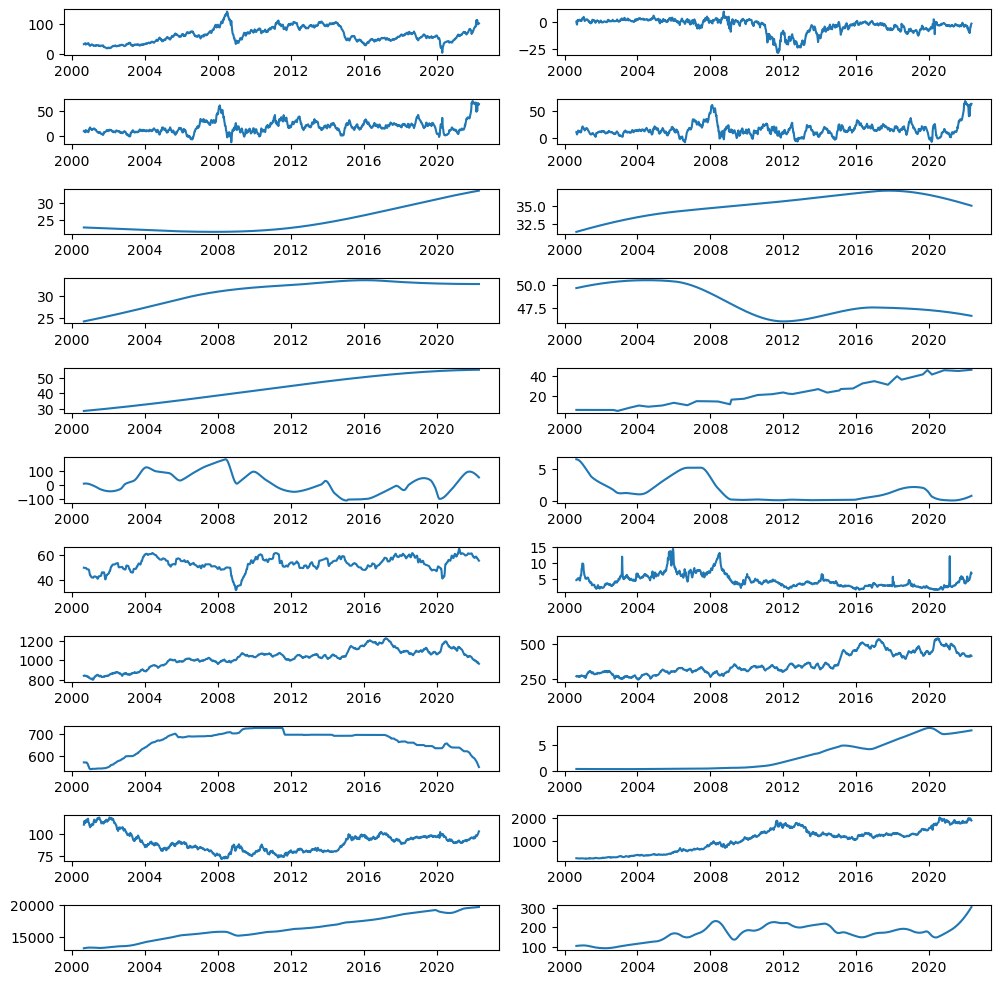

In [37]:
fig, axs = plt.subplots(11,2)
fig.tight_layout()
n = len(df_final_clean.columns)
#print(n)
for i in range(n):
    #print(i)
    axs[i//2, i%2].plot(df_final_clean[df_final_clean.columns[i]])
    

In [38]:
df_final_clean

,WTI Spot Price ($ per barrel),WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
Date,,,,,,,,,,,,,,,,,,,,,,
2000-08-25,32.46,0.69,10.173947,10.863947,22.818314,31.511831,24.253930,49.611187,28.462708,6.220000,10.250146,6.599460,49.900000,4.63,842.054,270.948,571.106,0.408969,111.419998,277.000000,13216.511054,106.664580
2000-09-01,33.08,-1.24,9.673125,8.433125,22.814929,31.525013,24.270018,49.619576,28.483413,6.220000,10.572120,6.588459,49.900000,4.66,844.797,273.691,571.106,0.408969,114.339996,273.299988,13225.700170,106.869191
2000-09-08,34.42,-2.01,8.446918,6.436918,22.811525,31.538174,24.286131,49.627926,28.504156,6.220000,10.838357,6.574116,49.820635,4.82,844.129,272.764,571.365,0.408969,115.940002,272.299988,13234.868962,107.065038
2000-09-15,34.70,1.44,8.275329,9.715329,22.808103,31.551314,24.302268,49.636235,28.524937,6.220000,11.046938,6.556328,49.738095,5.05,841.647,270.282,571.365,0.408969,113.559998,271.799988,13244.017092,107.252122
2000-09-22,35.49,2.40,7.588356,9.988356,22.804664,31.564433,24.318429,49.644504,28.545757,6.220000,11.195944,6.534990,49.700000,5.17,841.146,269.781,571.365,0.408969,113.250000,273.600006,13253.144218,107.430443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,103.89,-7.37,61.558067,54.188067,33.344364,35.028005,32.752883,46.628363,55.138453,45.687692,64.132896,0.668823,57.100000,5.41,976.951,412.371,564.580,7.855408,99.800003,1941.599976,19663.855949,291.673139
2022-04-08,99.21,-4.12,66.916327,62.796327,33.362655,35.014449,32.752999,46.621296,55.141093,45.720769,61.763815,0.693471,56.733396,6.08,982.434,421.753,560.681,7.867314,100.500000,1970.900024,19668.392999,294.449646
2022-04-15,101.46,-3.96,65.215571,61.255571,33.380901,35.000876,32.753134,46.614191,55.143643,45.753846,59.344427,0.718550,56.210452,6.64,969.713,413.733,555.980,7.879347,101.220001,1931.000000,19672.876981,297.257125


In [39]:
df_final_clean.to_csv('FinalDataSet.csv')